In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
df = pd.read_csv('hill-valley_csv.csv')

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [5]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V97      0
V98      0
V99      0
V100     0
Class    0
Length: 101, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
y = df.Class
X = df.drop(['Class'], axis=1)

In [8]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(X,y)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']
featureScores

,Features,Score
0,V1,9704.863562
1,V2,15140.426588
2,V3,12454.963524
3,V4,15162.543941
4,V5,18547.354848
...,...,...
95,V96,12090.566376
96,V97,14329.437807
97,V98,13042.384599
98,V99,14923.935988


In [10]:
print(featureScores.nlargest(25,'Score'))

   Features         Score
72      V73  64289.047317
75      V76  61491.634470
73      V74  60606.217434
40      V41  60352.743648
55      V56  59282.921174
74      V75  59138.458497
36      V37  58494.465144
71      V72  58175.537895
61      V62  57631.516383
49      V50  56631.163918
43      V44  56474.306174
81      V82  56389.356703
77      V78  56069.246436
59      V60  55665.244789
38      V39  55160.192941
57      V58  55133.197386
78      V79  55016.614813
41      V42  54944.344923
39      V40  54901.768800
53      V54  54695.365534
35      V36  54616.191350
42      V43  54390.017154
79      V80  54025.144315
70      V71  53856.016219
62      V63  53530.764171


In [11]:
X1 = df.loc[:,['V73','V76','V74','V41','V56']]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)

In [13]:
from sklearn.svm import SVC
model1=SVC(gamma='auto')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.4773662551440329

In [14]:
X2 = df.loc[:,['V73','V76','V74','V41','V56','V75','V37','V72','V62','V50']]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC
model1=SVC(gamma='auto')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.4897119341563786

In [17]:
X3 = df.loc[:,['V73','V76','V74','V41','V56','V75','V37','V72','V62','V50','V44','V82','V78','V60','V39']]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X3,y,test_size=0.2)

In [19]:
from sklearn.svm import SVC
model1=SVC(gamma='auto')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.4773662551440329

In [20]:
X4 = df.loc[:,['V73','V76','V74','V41','V56','V75','V37','V72','V62','V50','V44','V82','V78','V60','V39','V58','V79','V42','V40','V54']]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X4,y,test_size=0.2)

In [22]:
from sklearn.svm import SVC
model1=SVC(gamma='auto')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.42386831275720166

In [23]:
X5 = df.loc[:,['V73','V76','V74','V41','V56','V75','V37','V72','V62','V50','V44','V82','V78','V60','V39','V58','V79','V42','V40','V54','V36','V43','V80','V71','V63']]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X5,y,test_size=0.2)

In [25]:
from sklearn.svm import SVC
model1=SVC(gamma='auto')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.49382716049382713

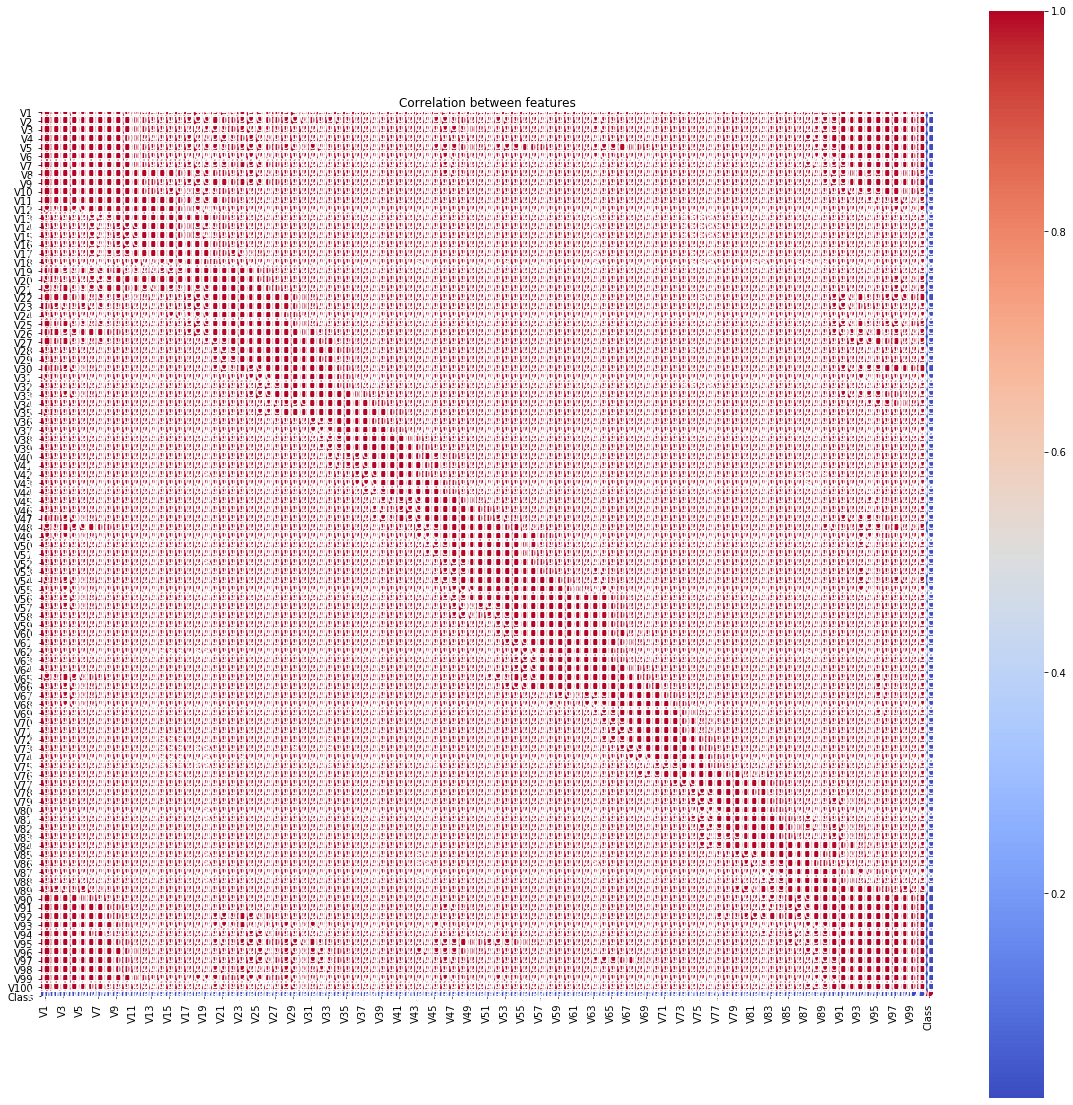

In [26]:
#Correlation
cor = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(cor, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={'size':15}, cmap='coolwarm')
plt.title('Correlation between features');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape

((969, 100), (243, 100))

In [ ]:
#Forward Feature Selection

In [28]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 5,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.4s finished

[2020-09-04 22:09:14] Features: 1/5 -- score: 0.538673774784886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   42.7s finished

[2020-09-04 22:09:57] Features: 2/5 -- score: 0.5707028194401932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:   41.7s finished

[2020-09-04 22:10:39] Features: 3/5 -- score: 0.5737722341257694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  97 out of  9

In [29]:
sfs.k_feature_names_

('V3', 'V17', 'V55', 'V61', 'V98')

In [30]:
sfs.k_score_

0.5954324388667823

In [31]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 10,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.1s finished

[2020-09-04 22:12:56] Features: 1/10 -- score: 0.538673774784886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   43.4s finished

[2020-09-04 22:13:40] Features: 2/10 -- score: 0.5707028194401932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:   42.6s finished

[2020-09-04 22:14:22] Features: 3/10 -- score: 0.5737722341257694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  97 out of

In [32]:
sfs.k_score_

0.6191885181784171

In [ ]:
#Backward Elimination

In [ ]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features= (0,100) , 
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

In [ ]:
sbs.k_feature_names_

In [ ]:
sbs.k_score_